## Feature selection of pyradiomic feutures
 #### As refered in article x the most common algoritms for feuture selection are random forest, PCA(principle component analysis) and LASSO(least absolute shrinkage and selection operator) we'll be using all 3 and choosing the one that has the best results in several metrics

library imports + dataset handling comemt further

In [140]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
dataset_path = 'radiomic_features_pylidc_and_fourier.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(dataset_path)
# Get the shape of the dataset (rows, columns)
print(data.shape)

# Get basic statistics about the dataset
print(data.describe())
X = data.drop(columns=['malignancy_mode','malignancy_mean'])  # Replace 'target' with the actual column name of your labels
y = data['malignancy_mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(2651, 126)
       diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                      2651.000000                         2651.000000   
mean                        -36.901213                        -2031.011316   
std                          35.392737                          837.572472   
min                        -273.544294                        -3024.000000   
25%                         -44.281785                        -3024.000000   
50%                         -26.226244                        -2048.000000   
75%                         -14.955267                        -1024.000000   
max                          -0.606900                         -220.000000   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                         2651.000000                         2651.000000   
mean                             0.506601                          767.754055   
std                              9.546720 

##### 1.1 Random forest

In [142]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and calculate accuracy before feature selection
y_pred = rf.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(initial_accuracy)


0.5649717514124294


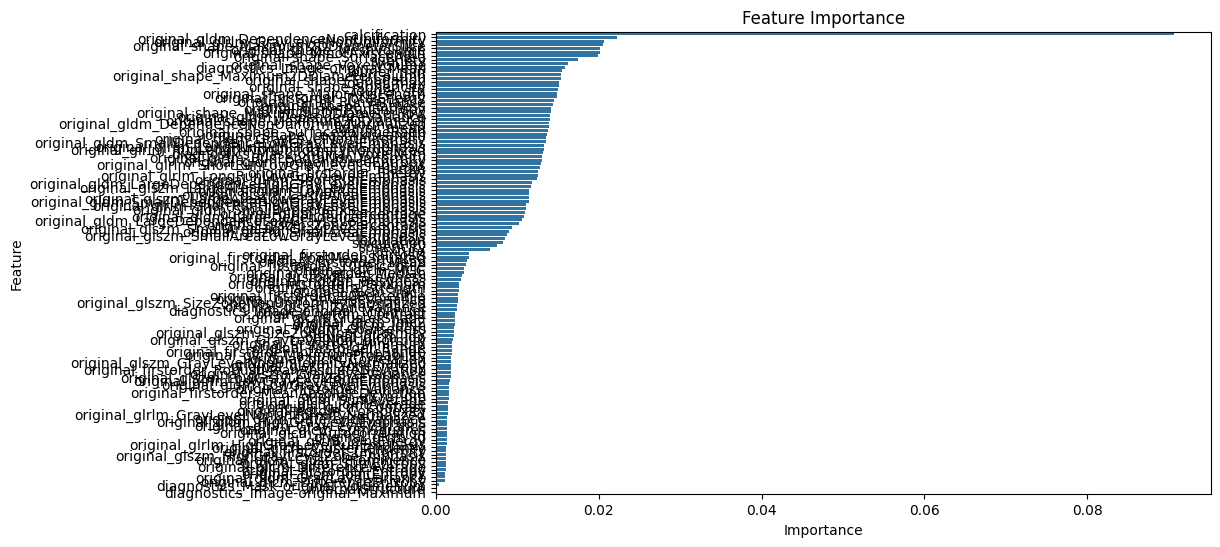

In [143]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [144]:
# Select top 5 features (as an example)
top_features = feature_importance_df.head(10)['Feature'].values

# Create a new dataset with only the top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


# Train the classifier with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions and calculate accuracy after feature selection
y_pred_selected = rf_selected.predict(X_test_selected)
selected_accuracy = accuracy_score(y_test, y_pred_selected)

print(f'Accuracy before feature selection: {initial_accuracy:.4f}')
print(f'Accuracy after feature selection: {selected_accuracy:.4f}')


Accuracy before feature selection: 0.5650
Accuracy after feature selection: 0.5687
